<a href="https://colab.research.google.com/github/Latiefabdul/My_Project/blob/main/DS_Project_Laptops_Price_Prediction_with_Regression_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><span style='background :#F5EEF3' > Laptops Price Prediction 

                                            

# <span style='background :#F5EEF3' > Background

- Laptop semakin bervariasi dari sisi jenis, spesifikasi, brand, dan juga harga. Sebagai seorang Data Scientist dari suatu website pengulas gadget kita diminta untuk membuat model prediksi harga laptop, sehingga jika kita mengetahui jenis, spesifikasi, brand, dan fitur-fitur lainnya maka kita dapat menentukan harga laptop baru sebelum laptop tersebut dipasarkan.

# <span style='background :#F5EEF3' > Importing Libraries and Loading Data   
    
    
    

In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings('ignore')

# <span style='background :#F5EEF3' > Importing Dataset

In [ ]:
df = pd.read_csv('drive/My Drive/Dataset5_Laptop_Price.csv')

In [ ]:
df

,laptop_ID,Company,TypeName,Inches,Cpu,Ram,Memory,OpSys,Weight,Price_euros
0,1,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,macOS,1.37kg,1339.69
1,2,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,macOS,1.34kg,898.94
2,3,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,No OS,1.86kg,575.00
3,4,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,macOS,1.83kg,2537.45
4,5,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Windows 10,1.8kg,638.00
1299,1317,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Windows 10,1.5kg,229.00
1301,1319,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,Windows 10,2.19kg,764.00


# <span style='background :#F5EEF3' > Data Cleaning and Data Preprocessing



- Pertama, kita ubah kolom menjadi lowercase agar lebih mudah dalam penulisan



In [ ]:
df = df.rename(columns=str.lower)


- Kita tidak membutuhkan kolom index dari tiap data

In [ ]:
df=df.drop('laptop_id', axis=1)


- Cek duplikasi data


In [ ]:
df[df.duplicated()]

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros
1115,Dell,Ultrabook,13.3,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Windows 10,1.23kg,1379.00
1274,Asus,Notebook,15.6,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Windows 10,2.2kg,369.00
1275,Asus,Ultrabook,13.3,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Windows 10,1.2kg,729.00
1276,Dell,Notebook,15.6,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Windows 10,2.3kg,459.00
1277,Acer,Notebook,15.6,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Linux,2.4kg,289.00
1278,Dell,Notebook,15.6,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Windows 10,2.20kg,379.00
1279,Lenovo,Notebook,15.6,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Windows 10,2.6kg,899.00
1280,HP,Notebook,15.6,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,Windows 10,2.04kg,549.99
1281,Dell,Notebook,15.6,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Linux,2.3kg,805.99
1282,HP,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Windows 10,1.17kg,209.00


- Drop data yang duplikat

In [ ]:
df=df.drop_duplicates()


- Cek null pada tiap kolom

In [ ]:
df.isnull().sum()

company        0
typename       0
inches         0
cpu            0
ram            0
memory         0
opsys          0
weight         0
price_euros    0
dtype: int64

## Dealing with RAM and Weight columns


- kita hilangkan string pada kolom RAM dan weight agar kita mendapatkan tipe numerik

In [ ]:
df['ram'] = df['ram'].str.replace('GB', '')
df['weight'] = df['weight'].str.replace('kg', '')


In [ ]:
df['ram']=df['ram'].astype(int)
df['weight']=df['weight'].astype(float)

In [ ]:
df

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Windows 10,2.20,720.32
1270,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Windows 10,1.80,638.00
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Windows 10,1.30,1499.00
1272,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Windows 10,1.50,229.00


## Dealing with CPU column


In [ ]:
df['cpu'].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
AMD E-Series E2-9000 2.2GHz      1
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A9-Series 9410 2.9GHz        1
Name: cpu, Length: 118, dtype: int64

<hr>

- Kita keluarkan frekuensi CPU dan brand CPU ke kolom terpisah



In [ ]:
df['cpu_frq(GHz)']=df['cpu'].str.extract(r"(\d+\s*GHz|\d+(?:\.\d+)\s*GHz)")

df['cpu_frq(GHz)']=df['cpu_frq(GHz)'].str.replace("GHz","")
df['cpu_frq(GHz)']=df['cpu_frq(GHz)'].astype(float)

In [ ]:
df

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz)
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69,2.3
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00,2.5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45,2.7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60,3.1
...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Windows 10,2.20,720.32,2.5
1270,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Windows 10,1.80,638.00,2.5
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Windows 10,1.30,1499.00,2.5
1272,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Windows 10,1.50,229.00,1.6


In [ ]:
df['cpu_brand']=df['cpu'].str.extract(r"^([\w\-]+)")

In [ ]:
df

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00,2.5,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Windows 10,2.20,720.32,2.5,Intel
1270,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Windows 10,1.80,638.00,2.5,Intel
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Windows 10,1.30,1499.00,2.5,Intel
1272,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Windows 10,1.50,229.00,1.6,Intel


In [ ]:
df[df['cpu_frq(GHz)'].isnull() == True]

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand


In [ ]:
df['cpu_frq(GHz)'].value_counts()

2.50    285
2.80    165
2.70    164
1.60    123
2.30     86
2.00     86
1.80     78
2.60     74
1.10     53
2.40     49
2.90     19
3.00     19
1.20     15
1.44     12
2.20     11
1.50     10
1.30      6
3.60      5
3.10      3
2.10      3
1.90      2
0.90      2
3.20      1
1.00      1
1.92      1
Name: cpu_frq(GHz), dtype: int64

In [ ]:
df[df['cpu_frq(GHz)'].isnull() == False]

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00,2.5,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Windows 10,2.20,720.32,2.5,Intel
1270,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Windows 10,1.80,638.00,2.5,Intel
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Windows 10,1.30,1499.00,2.5,Intel
1272,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Windows 10,1.50,229.00,1.6,Intel


## Dealing with memory column


In [ ]:
df['memory'].value_counts()

256GB SSD                        411
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

- Kita ubah satuan memory ke GB

In [ ]:
df['memory']=df['memory'].str.replace('2TB','2000GB')
df['memory']=df['memory'].str.replace('1.0TB','1TB', regex=True)
df['memory']=df['memory'].str.replace('1TB','1000GB')



In [ ]:
df

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00,2.5,Intel
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Windows 10,2.20,720.32,2.5,Intel
1270,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Windows 10,1.80,638.00,2.5,Intel
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Windows 10,1.30,1499.00,2.5,Intel
1272,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Windows 10,1.50,229.00,1.6,Intel


- Beberapa laptop memiliki dua memory, kita pisahkan menjadi 4 kolom (jenis dan kapasitas) untuk masing-masing memory

In [ ]:
df[['memory1_type','memory2_type']]=df['memory'].str.split('+', expand=True)

In [ ]:
df[df['memory2_type'].isna() == False]

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type
21,Lenovo,Gaming,15.6,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1000GB HDD,Windows 10,2.50,999.0,2.5,Intel,128GB SSD,1000GB HDD
28,Dell,Ultrabook,15.6,Intel Core i7 8650U 1.9GHz,8,256GB SSD + 256GB SSD,Windows 10,1.88,1298.0,1.9,Intel,256GB SSD,256GB SSD
37,Dell,Notebook,17.3,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1000GB HDD,Windows 10,2.80,979.0,1.6,Intel,128GB SSD,1000GB HDD
41,Dell,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1000GB HDD,Windows 10,2.65,1499.0,2.8,Intel,256GB SSD,1000GB HDD
47,Asus,Gaming,17.3,AMD Ryzen 1700 3GHz,8,256GB SSD + 1000GB HDD,Windows 10,3.20,1299.0,3.0,AMD,256GB SSD,1000GB HDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,MSI,Gaming,15.6,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1000GB HDD,Windows 10,2.30,1169.0,2.6,Intel,128GB SSD,1000GB HDD
1245,Asus,Gaming,15.6,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1000GB HDD,Windows 10,2.50,1600.0,2.8,Intel,256GB SSD,1000GB HDD
1247,Asus,Gaming,15.6,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1000GB HDD,Windows 10,2.34,2325.0,2.6,Intel,256GB SSD,1000GB HDD
1256,Asus,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1000GB HDD,Windows 10,4.00,1900.0,2.6,Intel,128GB SSD,1000GB HDD


In [ ]:
df['memory2_type'].value_counts()

  1000GB HDD       185
  2000GB HDD        15
  256GB SSD          3
  500GB HDD          2
  1000GB Hybrid      2
  512GB SSD          1
Name: memory2_type, dtype: int64

In [ ]:
df['memory1_capacity']=df['memory'].str.extract(r"([\d. +-/]+)\s*GB")
df['memory1_type']=df['memory1_type'].str.replace(r"([\d. +-/]+)\s*GB", '', regex=True)

df['memory2_capacity']=df['memory2_type'].str.extract(r"([\d. +-/]+)\s*GB")
df['memory2_type']=df['memory2_type'].str.replace(r"([\d. +-/]+)\s*GB", '', regex=True)


In [ ]:
df['memory1_capacity']=df['memory1_capacity'].astype(float)
df['memory2_capacity']=df['memory2_capacity'].astype(float)

In [ ]:
df[df['memory2_type'].isna() == True]

,company,typename,inches,cpu,ram,memory,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type,memory1_capacity,memory2_capacity
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,macOS,1.37,1339.69,2.3,Intel,SSD,None,128.0,NaN
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,macOS,1.34,898.94,1.8,Intel,Flash Storage,None,128.0,NaN
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,No OS,1.86,575.00,2.5,Intel,SSD,None,256.0,NaN
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,macOS,1.83,2537.45,2.7,Intel,SSD,None,512.0,NaN
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,macOS,1.37,1803.60,3.1,Intel,SSD,None,256.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Windows 10,2.20,720.32,2.5,Intel,HDD,None,500.0,NaN
1270,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Windows 10,1.80,638.00,2.5,Intel,SSD,None,128.0,NaN
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Windows 10,1.30,1499.00,2.5,Intel,SSD,None,512.0,NaN
1272,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Windows 10,1.50,229.00,1.6,Intel,Flash Storage,None,64.0,NaN


In [ ]:
df["memory2_capacity"].value_counts()

1000.0    187
2000.0     15
256.0       3
500.0       2
512.0       1
Name: memory2_capacity, dtype: int64

In [ ]:
df["memory2_capacity"]= df["memory2_capacity"].replace({'NaN': np.nan})
df["memory2_capacity"]= df["memory2_capacity"].fillna(0)

In [ ]:
df=df.drop(['memory'], axis=1)
df

,company,typename,inches,cpu,ram,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type,memory1_capacity,memory2_capacity
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,macOS,1.37,1339.69,2.3,Intel,SSD,None,128.0,0.0
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,macOS,1.34,898.94,1.8,Intel,Flash Storage,None,128.0,0.0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,No OS,1.86,575.00,2.5,Intel,SSD,None,256.0,0.0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,macOS,1.83,2537.45,2.7,Intel,SSD,None,512.0,0.0
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,macOS,1.37,1803.60,3.1,Intel,SSD,None,256.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,Intel Core i7 6500U 2.5GHz,4,Windows 10,2.20,720.32,2.5,Intel,HDD,None,500.0,0.0
1270,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,Windows 10,1.80,638.00,2.5,Intel,SSD,None,128.0,0.0
1271,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,Windows 10,1.30,1499.00,2.5,Intel,SSD,None,512.0,0.0
1272,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,Windows 10,1.50,229.00,1.6,Intel,Flash Storage,None,64.0,0.0


## Dealing with opsys column


- Kita standarkan kolom jenis sistem operasi untuk nilai Windows dan macOS

In [ ]:
df['opsys'].value_counts()

Windows 10      1046
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: opsys, dtype: int64

In [ ]:
df['opsys']=df['opsys'].replace({'Windows 10' : 'Windows', 'Windows 10 S' : 'Windows', 'Windows 7' : 'Windows', 'Mac OS X' : 'macOS' }) 

In [ ]:
df['opsys'].value_counts()

Windows      1099
No OS          66
Linux          58
Chrome OS      27
macOS          21
Android         2
Name: opsys, dtype: int64

# <span style='background :#F5EEF3'> Exploratory Data Analysis EDA
        
        


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

sns.set(rc={'figure.figsize':(14,5)})

## Manufacturing and Type

Text(0.5, 1.0, 'Laptop Price by Company')

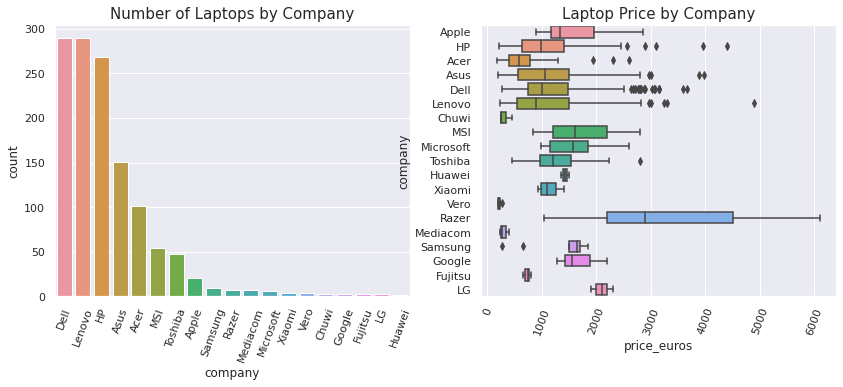

In [ ]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="company",ax=axes[0],data=df,order=df["company"].value_counts().index)
sns.boxplot(x ='price_euros',y ="company",data = df)

axes[0].set_title("Number of Laptops by Company",fontsize=15)
axes[1].set_title("Laptop Price by Company",fontsize=15)

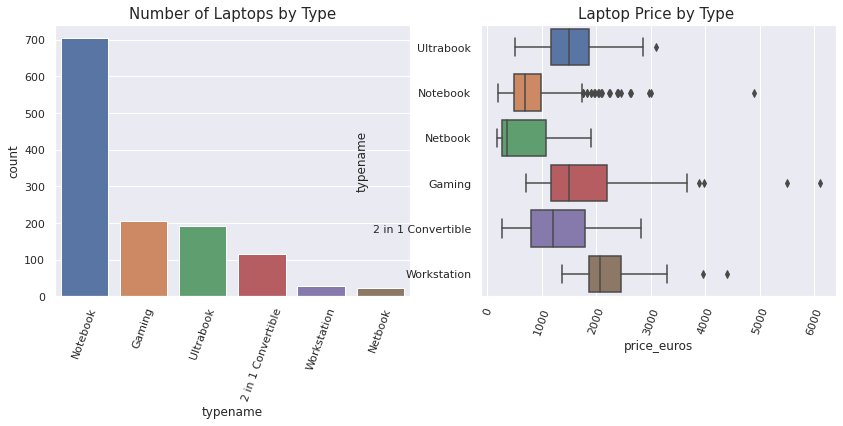

In [ ]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="typename",ax=axes[0],data=df,order=df["typename"].value_counts().index)
sns.boxplot(x ='price_euros',y ="typename" ,ax=axes[1],data = df)

axes[0].set_title("Number of Laptops by Type",fontsize=15)
axes[1].set_title("Laptop Price by Type ",fontsize=15)
plt.show()

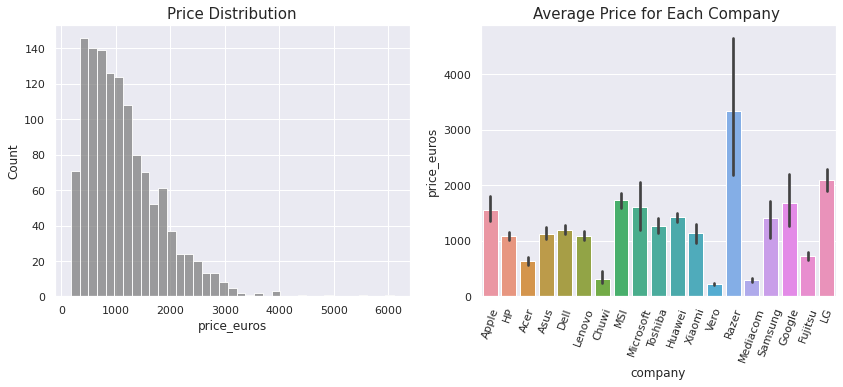

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.histplot(x="price_euros",ax=axes[0],color="grey",data=df)
sns.barplot(x="company",y='price_euros',estimator=np.mean,ax=axes[1],data=df)
plt.xticks(rotation=70)
axes[0].set_title("Price Distribution",fontsize=15)
axes[1].set_title("Average Price for Each Company ",fontsize=15)
plt.show()


- Dell, Lenovo, HP, Asus, Acer adalah brand populer di dataset
- Samsung, Razer, Mediacom, Microsoft, Xiaomi, Vero, Chuwi, Google, Fujitsu, LG, Huawei hanya ada 10 laptop di dataset
- Razer adalah laptop paling mahal, kita hanya memiliki 7 laptop Razer
- Dari brand yang populer pada dataset, MSI memiliki harga rata-rata termahal
- Dell, Lenovo, HP, Asus memiliki harga laptop rata-rata 1000 euro
- Vero paling murah dari semua brand, Acer paling murah dari semua brand yang populer
- Range harga antara 200 hingga 6000, akan tetapi mayoritas harga laptop di bawah 4000
- Notebook adalah jenis yang paling populer
- Netbook adalah jenis yang paling tidak populer
- Notebooks dan netbooks memiliki harga rata-rata terendah

In [ ]:
df[df["price_euros"]>4000]

,company,typename,inches,cpu,ram,opsys,weight,price_euros,cpu_frq(GHz),cpu_brand,memory1_type,memory2_type,memory1_capacity,memory2_capacity
196,Razer,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32,Windows,3.49,6099.0,2.9,Intel,SSD,None,1000.0,0.0
610,Lenovo,Notebook,15.6,Intel Xeon E3-1535M v6 3.1GHz,32,Windows,2.50,4899.0,3.1,Intel,SSD,None,1000.0,0.0
749,HP,Workstation,17.3,Intel Xeon E3-1535M v5 2.9GHz,16,Windows,3.00,4389.0,2.9,Intel,SSD,None,256.0,0.0
830,Razer,Gaming,17.3,Intel Core i7 7820HK 2.9GHz,32,Windows,3.49,5499.0,2.9,Intel,SSD,None,512.0,0.0


- Hanya ada 4 laptops dengan harga di atas 4000, 2 Razer, 1 HP, dan 1 Lenovo.
- Kita dapat simpulkan bahwa 4000 adalah outlier dan akan kita drop.

In [ ]:
df=df[df["price_euros"]<4000]

##  CPU and Operating System 

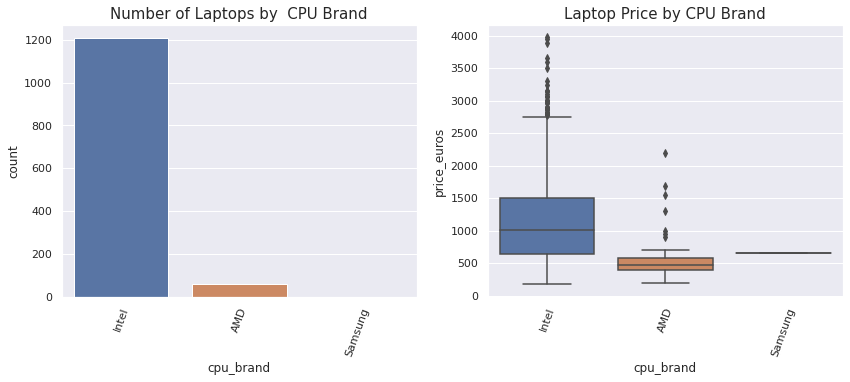

In [ ]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="cpu_brand",ax=axes[0],data=df,order=df["cpu_brand"].value_counts().index)
sns.boxplot(x ="cpu_brand",y ="price_euros" ,ax=axes[1],data = df)

axes[0].set_title("Number of Laptops by  CPU Brand",fontsize=15)
axes[1].set_title("Laptop Price by CPU Brand",fontsize=15)


plt.show()


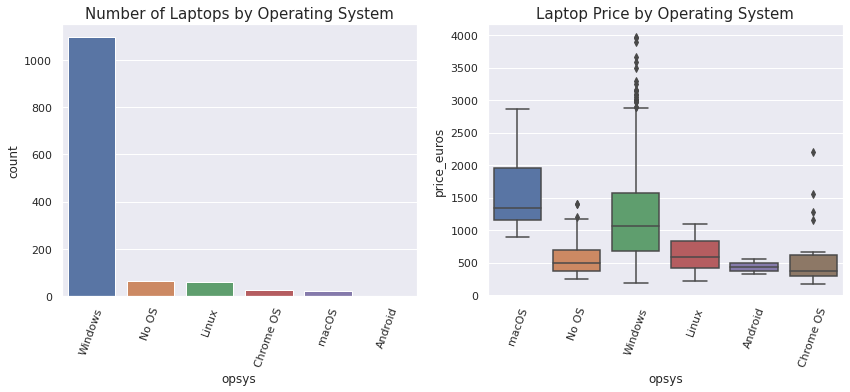

In [ ]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)
sns.countplot(x="opsys",ax=axes[0],data=df,order=df["opsys"].value_counts().index)
sns.boxplot(x ="opsys",y ='price_euros' ,ax=axes[1],data = df)

axes[0].set_title("Number of Laptops by Operating System",fontsize=15)
axes[1].set_title("Laptop Price by Operating System",fontsize=15)
plt.show()


- Intel adalah CPU paling populer dan paling mahal, serta memiliki gap yang sangat besar ke CPU lainnya

- Intel ( Core i5 7200U, Core i7 7700HQ, Core i7 7500U) adalah jenis CPU paling populer
- Kita memiliki 5 sistem operasi Windows, Mac, Chrome, Linux, dan Android. Adapun laptop yang dijual kosongan tanpa sistem operasi (No OS)
- Laptop macOS memiliki harga rata-rata termahal dan laptop Linux termurah

## Weight and Screen Size

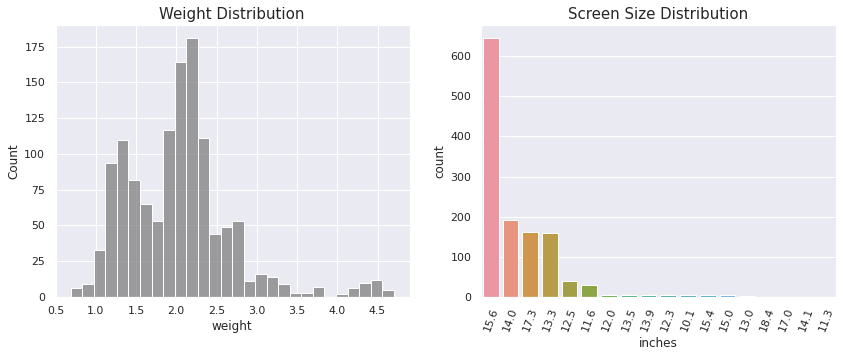

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.histplot(x="weight",ax=axes[0],color="grey",data=df)
sns.countplot(x="inches",ax=axes[1],order=df["inches"].value_counts().index,data=df)
plt.xticks(rotation=70)
axes[0].set_title("Weight Distribution",fontsize=15)
axes[1].set_title("Screen Size Distribution",fontsize=15)

plt.show()

- Lebih dari setengah laptop pada dataset memiliki layar ukuran 15.6 inches.
- [15.6,17.3,14,13.3,12.5,11.6] adalah ukuran layar paling banyak
- [2.20,2.20,2.00,2.4,2.5] adalah ukuran berat laptop paling banyak, dan hampir semua laptop memiliki ukuran berat antara 1.3 dan 2.5 .


## RAM and Hard Drive

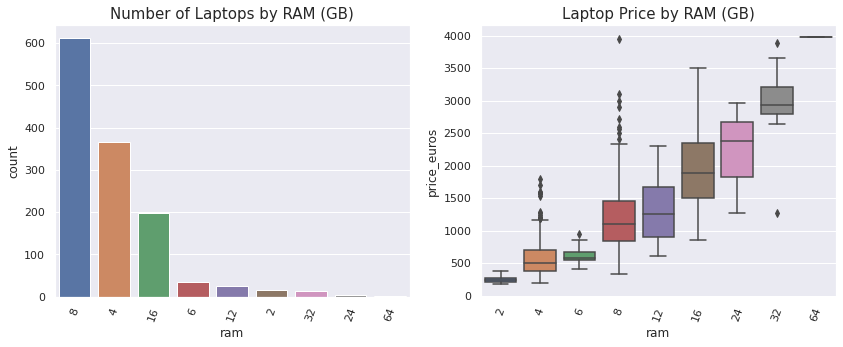

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="ram",ax=axes[0],order=df["ram"].value_counts().index,data=df)
sns.boxplot(x ="ram",y ="price_euros" ,data = df)

axes[0].set_title("Number of Laptops by RAM (GB)",fontsize=15)
axes[1].set_title("Laptop Price by RAM (GB)",fontsize=15)

plt.show()


- Range RAM dari 8 GB hingga 64 GB. RAM paling banyak adalah 8 GB
- Tampak adanya hubungan yang mencolok antara RAM dan harga laptop, semakin besar RAM semakin mahal
- Kita hanya memiliki 3 laptop dengan RAM 24 GB dan 1 laptop dengan RAM 64 GB. Kita drop sebagai outlier

In [ ]:
df=df[df["ram"].isin([24,64]) == False]

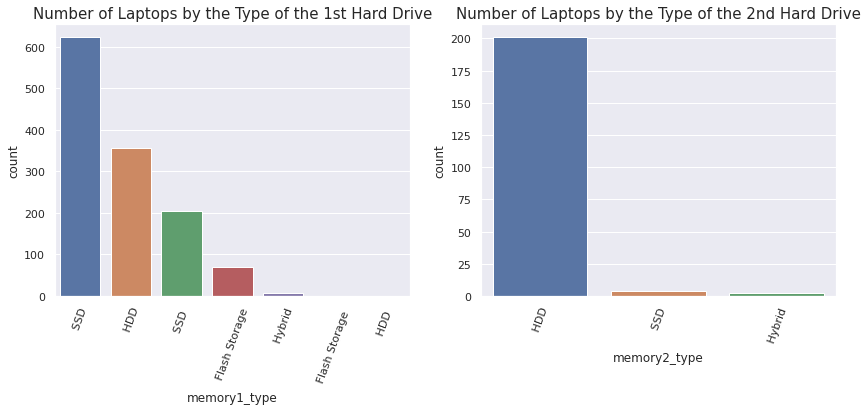

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="memory1_type",ax=axes[0],order=df["memory1_type"].value_counts().index,data=df)
sns.countplot(x="memory2_type",ax=axes[1],order=df["memory2_type"].value_counts().index,data=df)

axes[0].set_title("Number of Laptops by the Type of the 1st Hard Drive",fontsize=15)
axes[1].set_title("Number of Laptops by the Type of the 2nd Hard Drive",fontsize=15)

plt.show()


- Memory type 1 di dominasi oleh SSD
- Memory type 2 di dominasi oleh HDD



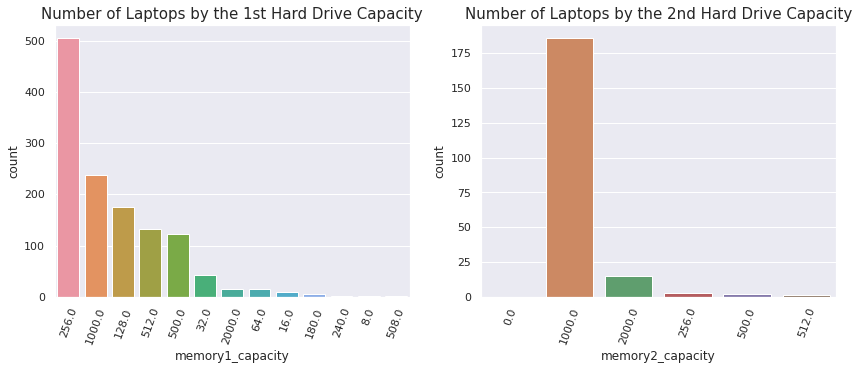

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="memory1_capacity",ax=axes[0],order=df["memory1_capacity"].value_counts().index,data=df)
sns.countplot(x="memory2_capacity",ax=axes[1],order=df["memory2_capacity"].value_counts().index,data=df[df["memory2_capacity"]!=0])

axes[0].set_title("Number of Laptops by the 1st Hard Drive Capacity",fontsize=15)
axes[1].set_title("Number of Laptops by the 2nd Hard Drive Capacity",fontsize=15)

plt.show()


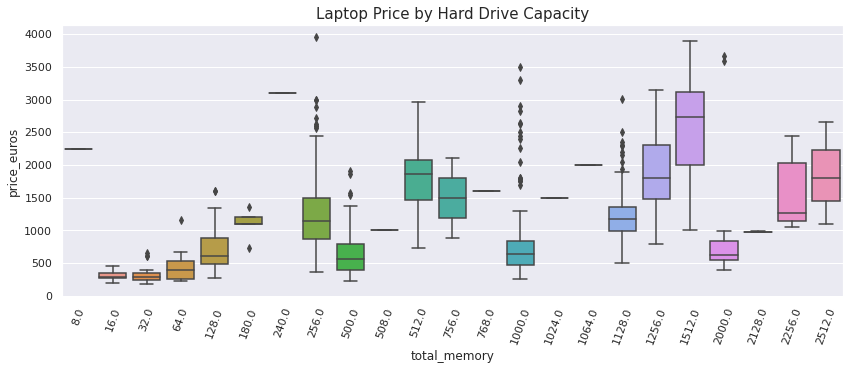

In [ ]:
df["total_memory"]=df["memory1_capacity"]+df["memory2_capacity"]
sns.boxplot(x ="total_memory",y ="price_euros" ,data = df)
plt.xticks(rotation=70)
plt.title("Laptop Price by Hard Drive Capacity",fontsize=15)
plt.show()

- Kita memiliki 180 laptop dengan 2 memory.
- Jenis memory 1 paling umum adalah SSD dengan kapasitas 256 GB
- Jenis memory 2 paling umum adalah HDD dengan kapasitas 1000 GB
- Memory 2 memiliki kapasitas lebih besar dari memory 1
- Kapasitas memory memiliki dampak terhadap harga, akan tetapi terlihat tidak terlalu kuat

# <span style='background :#F5EEF3'> Model Development





*   Load beberapa library yang dibutuhkan



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline

*   Assign df ke variabel baru untuk backup

In [ ]:
df_model=df

In [ ]:
df_model.columns

Index(['company', 'typename', 'inches', 'cpu', 'ram', 'opsys', 'weight',
       'price_euros', 'cpu_frq(GHz)', 'cpu_brand', 'memory1_type',
       'memory2_type', 'memory1_capacity', 'memory2_capacity', 'total_memory'],
      dtype='object')

## Data Preparation

* One hot encode untuk kolom-kolom kategorikal

In [ ]:
col_to_encode=['company', 'typename','opsys','cpu','memory1_type', 'memory2_type','cpu_brand']

In [ ]:
df_model = pd.get_dummies(df_model, columns = col_to_encode)

In [ ]:
print(df_model.shape)
df_model

(1265, 168)


,inches,ram,weight,price_euros,cpu_frq(GHz),memory1_capacity,memory2_capacity,total_memory,company_Acer,company_Apple,...,memory1_type_ HDD,memory1_type_ Hybrid,memory1_type_ SSD,memory1_type_ SSD,memory2_type_ HDD,memory2_type_ Hybrid,memory2_type_ SSD,cpu_brand_AMD,cpu_brand_Intel,cpu_brand_Samsung
0,13.3,8,1.37,1339.69,2.3,128.0,0.0,128.0,0,1,...,0,0,1,0,0,0,0,0,1,0
1,13.3,8,1.34,898.94,1.8,128.0,0.0,128.0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,15.6,8,1.86,575.00,2.5,256.0,0.0,256.0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,15.4,16,1.83,2537.45,2.7,512.0,0.0,512.0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,13.3,8,1.37,1803.60,3.1,256.0,0.0,256.0,0,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,15.6,4,2.20,720.32,2.5,500.0,0.0,500.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1270,14.0,4,1.80,638.00,2.5,128.0,0.0,128.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1271,13.3,16,1.30,1499.00,2.5,512.0,0.0,512.0,0,0,...,0,0,1,0,0,0,0,0,1,0
1272,14.0,2,1.50,229.00,1.6,64.0,0.0,64.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_model.isnull().sum()

inches                  0
ram                     0
weight                  0
price_euros             0
cpu_frq(GHz)            0
                       ..
memory2_type_ Hybrid    0
memory2_type_ SSD       0
cpu_brand_AMD           0
cpu_brand_Intel         0
cpu_brand_Samsung       0
Length: 168, dtype: int64

* Train and Test Splitting

In [ ]:
X = df_model
Y = X['price_euros'].values
X = X.drop('price_euros', axis = 1).values

In [ ]:
Y

array([1339.69,  898.94,  575.  , ..., 1499.  ,  229.  ,  764.  ])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=9)

In [ ]:
X_train

array([[14.  ,  8.  ,  1.64, ...,  0.  ,  1.  ,  0.  ],
       [15.6 , 12.  ,  2.15, ...,  0.  ,  1.  ,  0.  ],
       [13.3 ,  4.  ,  1.2 , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [15.6 ,  8.  ,  2.5 , ...,  0.  ,  1.  ,  0.  ],
       [15.6 ,  8.  ,  1.9 , ...,  0.  ,  1.  ,  0.  ],
       [14.  ,  8.  ,  1.5 , ...,  0.  ,  1.  ,  0.  ]])

In [ ]:
Y_train

array([1089.,  659.,  369., ..., 1169.,  663., 1099.])

## Hyperparameter Search & Cross Validation



*   Buat pipeline untuk beberapa algoritam regresi untuk mendapatkan hasil default terbaik
*   Kita gunakan 10 K-fold cross validation untuk mendapatkan sample terbaik





In [ ]:
pipelines = []
pipelines.append(('LinearRegression', Pipeline([('LR',LinearRegression())])))
pipelines.append(('Lasso', Pipeline([('LASSO', Lasso())])))
pipelines.append(('Ridge', Pipeline([('Ridge', Ridge())])))
pipelines.append(('ElasticNet', Pipeline([('EN', ElasticNet())])))
pipelines.append(('DecisionTreeRegressor', Pipeline([('CART', DecisionTreeRegressor())])))
pipelines.append(('RandomForestRegressor', Pipeline([('RF', RandomForestRegressor())])))
pipelines.append(('GradientBoostingRegressor', Pipeline([('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=9, shuffle = True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LinearRegression: -3751985665.246282 (2270541287.444616)
Lasso: -246.066761 (33.310205)
Ridge: -241.988216 (29.403868)
ElasticNet: -290.174210 (36.170677)
DecisionTreeRegressor: -242.313354 (36.082166)
RandomForestRegressor: -191.215606 (37.082462)
GradientBoostingRegressor: -207.660522 (31.963383)




*   Random Forest memiliki performa terbaik dengan nilai MAE terkecil
*   Kita uji kembali beberapa algoritma ini menggunakan hyperparameter search
*   Kita uji menggunakan shufflesplit dan juga K-fold split



In [ ]:
def find_best_model_using_gridsearchcv(X,y, cv):
    algos = {'linear_regression' : {'model': LinearRegression(), 'params': {'normalize': [True, False] } },
        'lasso': {'model': Lasso(), 'params': { 'alpha': [0.1, 1, 10, 100]}},
        'ridge': {'model': Ridge(), 'params': { 'alpha': [0.1, 1, 10, 100]}},
        'elastic_net': {'model': ElasticNet(), 'params': { 'alpha': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}},
        'decision_tree':{'model': DecisionTreeRegressor(),'params': {'criterion' : ['mse','mae'], 'splitter': ['best','random']}},
        'Random_forest': {'model':RandomForestRegressor(), 'params' :{'random_state' : [9], 'n_estimators' : [50, 100, 125],'max_depth':[10, 30, 50],'max_features':[10,15,20]}},
        'Gradient_boosted_tree': {'model':GradientBoostingRegressor(), 'params' :{'loss' : ['squared_error','absolute_error'], 
                                                                                  'n_estimators' : [50, 100, 125],'learning_rate':[0.1, 0.5, 0.9],
                                                                                  'criterion' : ['mse','mae']}}}
    scores = []
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=kfold, scoring='neg_mean_absolute_error')
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



In [ ]:
shuffle_split = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
shuffle_result = find_best_model_using_gridsearchcv(X_train, Y_train, shuffle_split)
shuffle_result

,model,best_score,best_params
0,linear_regression,-3.751986e+09,{'normalize': False}
1,lasso,-2.445586e+02,{'alpha': 0.1}
2,ridge,-2.419882e+02,{'alpha': 1}
3,elastic_net,-2.452092e+02,"{'alpha': 0.1, 'l1_ratio': 0.9}"
4,decision_tree,-2.399675e+02,"{'criterion': 'mae', 'splitter': 'best'}"
5,Random_forest,-1.896782e+02,"{'max_depth': 50, 'max_features': 15, 'n_estim..."
6,Gradient_boosted_tree,-1.959264e+02,"{'criterion': 'mse', 'learning_rate': 0.5, 'lo..."


In [ ]:
kfold = KFold(n_splits=10, random_state=9, shuffle = True)
kfold_result = find_best_model_using_gridsearchcv(X_train, Y_train, kfold)
kfold_result

,model,best_score,best_params
0,linear_regression,-3.751986e+09,{'normalize': False}
1,lasso,-2.445586e+02,{'alpha': 0.1}
2,ridge,-2.419882e+02,{'alpha': 1}
3,elastic_net,-2.452092e+02,"{'alpha': 0.1, 'l1_ratio': 0.9}"
4,decision_tree,-2.380391e+02,"{'criterion': 'mse', 'splitter': 'random'}"
5,Random_forest,-1.896782e+02,"{'max_depth': 50, 'max_features': 15, 'n_estim..."
6,Gradient_boosted_tree,-1.962636e+02,"{'criterion': 'mse', 'learning_rate': 0.5, 'lo..."




*   Hasil hyperparameter search kedua metode split menghasilkan Random Forest sebagai regressor dengan nilai MAE terkecil

*   Kita buat model menggunakan Random Forest dengan hasil hyperparameter search terbaik





## Model Building

In [ ]:
hyper_param = shuffle_result.loc[shuffle_result['best_score'] == shuffle_result['best_score'].max(), 'best_params'].to_list()

hyper_params = hyper_param[0]

for key,val in hyper_params.items():
        exec(key + '=val')
        print(key, ' ', val)

max_depth   50
max_features   15
n_estimators   125
random_state   9


In [ ]:
hyper_params = hyper_param[0]

for key,val in hyper_params.items():
        exec(key + '=val')
        print(key, ' ', val)

max_depth   50
max_features   15
n_estimators   125
random_state   9


In [ ]:
model = RandomForestRegressor(random_state=random_state, 
                              max_depth = max_depth, 
                              max_features = max_features, 
                              n_estimators = n_estimators)
model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=50, max_features=15, n_estimators=125,
                      random_state=9)

## Model Testing

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
predictions = model.predict(X_test)
print (mean_absolute_error(Y_test, predictions))

180.32354869878907


* Hasil model memberikan nilai MAE yang cukup baik sehingga kita dapat lanjutkan ke pembentukan dataframe akhir

In [ ]:
col_pred = df_model.columns.tolist()
col_pred.remove('price_euros')
col_pred

['inches',
 'ram',
 'weight',
 'cpu_frq(GHz)',
 'memory1_capacity',
 'memory2_capacity',
 'total_memory',
 'company_Acer',
 'company_Apple',
 'company_Asus',
 'company_Chuwi',
 'company_Dell',
 'company_Fujitsu',
 'company_Google',
 'company_HP',
 'company_Huawei',
 'company_LG',
 'company_Lenovo',
 'company_MSI',
 'company_Mediacom',
 'company_Microsoft',
 'company_Razer',
 'company_Samsung',
 'company_Toshiba',
 'company_Vero',
 'company_Xiaomi',
 'typename_2 in 1 Convertible',
 'typename_Gaming',
 'typename_Netbook',
 'typename_Notebook',
 'typename_Ultrabook',
 'typename_Workstation',
 'opsys_Android',
 'opsys_Chrome OS',
 'opsys_Linux',
 'opsys_No OS',
 'opsys_Windows',
 'opsys_macOS',
 'cpu_AMD A10-Series 9600P 2.4GHz',
 'cpu_AMD A10-Series 9620P 2.5GHz',
 'cpu_AMD A10-Series A10-9620P 2.5GHz',
 'cpu_AMD A12-Series 9700P 2.5GHz',
 'cpu_AMD A12-Series 9720P 2.7GHz',
 'cpu_AMD A12-Series 9720P 3.6GHz',
 'cpu_AMD A4-Series 7210 2.2GHz',
 'cpu_AMD A6-Series 7310 2GHz',
 'cpu_AMD A6-S

* Menggabungkan X_Test, Y_test, dan hasil prediksi menjadi satu dataframe

In [ ]:
data_tuples = list(zip(Y_test, predictions))
data_tuples

predicts  = pd.DataFrame(data_tuples, columns = ['actual_price_euros', 'preds_price_euros'])

df_out = pd.DataFrame(X_test, columns = col_pred)
df_out = pd.merge(df_out, predicts,how = 'left',left_index = True, right_index = True)

* Kita kembalikan dataframe ke format sebelumnya atau reverse one hot encode

In [ ]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [ ]:
df_out = undummify(df_out.set_index(['inches',
 'ram',
 'weight',
 'cpu_frq(GHz)',
 'memory1_capacity',
 'memory2_capacity',
 'total_memory', 'actual_price_euros', 'preds_price_euros'])).reset_index()

print(df_out.shape)
print(df.shape)

df_out

(253, 15)
(1265, 15)


,inches,ram,weight,cpu_frq(GHz),memory1_capacity,memory2_capacity,total_memory,actual_price_euros,preds_price_euros,company,typename,opsys,cpu,memory1,memory2
0,17.3,4.0,2.36,2.0,1000.0,0.0,1000.0,659.00,583.522773,Dell,Notebook,Windows,Intel Core i3 6006U 2.0GHz,type_ HDD,type_ HDD
1,13.3,8.0,1.23,1.6,256.0,0.0,256.0,1399.00,1747.231680,Dell,Ultrabook,Windows,Intel Core i5 8250U 1.6GHz,type_ SSD,type_ HDD
2,15.6,8.0,1.84,2.7,256.0,0.0,256.0,1304.00,1200.315205,HP,Notebook,Windows,Intel Core i7 7500U 2.7GHz,type_ SSD,type_ HDD
3,15.6,16.0,2.20,2.8,256.0,1000.0,1256.0,2449.00,1706.421410,Asus,Gaming,Windows,Intel Core i7 7700HQ 2.8GHz,type_ SSD,type_ HDD
4,15.6,6.0,2.19,2.5,1000.0,0.0,1000.0,764.00,664.845440,HP,Notebook,Windows,Intel Core i7 6500U 2.5GHz,type_ HDD,type_ HDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,15.6,8.0,1.98,2.7,256.0,0.0,256.0,895.01,885.699627,Dell,Notebook,Linux,Intel Core i7 7500U 2.7GHz,type_ SSD,type_ HDD
249,15.6,6.0,2.40,2.5,1000.0,0.0,1000.0,564.00,615.856480,Lenovo,Notebook,Windows,Intel Core i5 7200U 2.5GHz,type_ HDD,type_ HDD
250,15.6,8.0,2.20,2.5,256.0,0.0,256.0,997.90,1131.493680,MSI,Gaming,Windows,Intel Core i5 7300HQ 2.5GHz,type_ SSD,type_ HDD
251,17.3,6.0,2.71,2.5,2000.0,0.0,2000.0,655.01,574.449200,HP,Notebook,Windows,AMD A10-Series 9620P 2.5GHz,type_ HDD,type_ HDD


# Model Explainability

## Feature Importance

In [ ]:
from sklearn.inspection import permutation_importance

* Kita coba analisis fitur apa saja yang menjadi fitur penting oleh model dalam melakukan prediksi
* Kita gunakan pendekatan Mean Decrease in Impurity dan Mean Decrease Accuracy untuk melihat fitur apa saja yang paling berpengaruh
* Mean Decrease Impurity adalah metode pengukuran seberapa penting suatu fitur menggunakan pendekatan pemisahan keputusan dari suatu fitur pada tree based algorithm, semakin besar nilai MDI maka tersebut semakin penting dalam menentukan model
* Mean Decrease Accuracy adalah metode pengukuran seberapa penting suatu fitur menggunakan pendekatan permutasi dari beberapa sampel sebelum melakukan pemisahan keputusan dari suatu fitur pada tree based algorithm, semakin besar nilai MDI maka tersebut semakin penting dalam menentukan model.
* Umumnya MDA lebih sering digunakan karena nilai plus dari pendekatan permutasi beberapa sampel yang berbeda dari data training.

In [ ]:
importances = model.feature_importances_

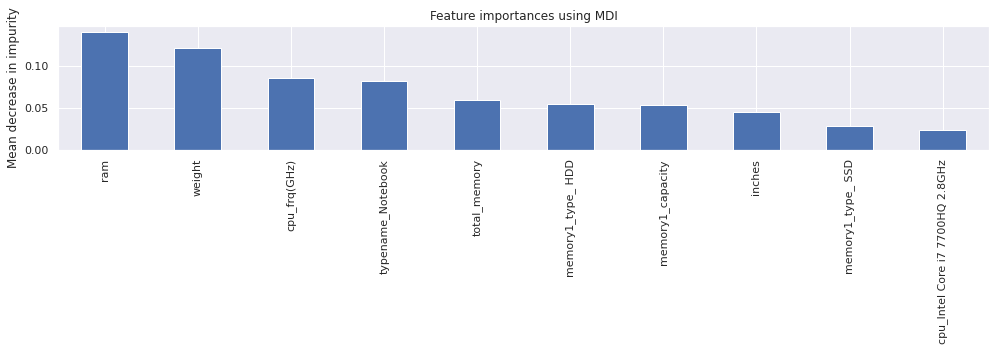

In [ ]:
forest_importances = pd.Series(importances, index=col_pred)

forest_importances.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots()
forest_importances.head(10).plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
result_permutation = permutation_importance(
    model, X_test, Y_test, n_repeats=10, random_state=9, n_jobs=2
)

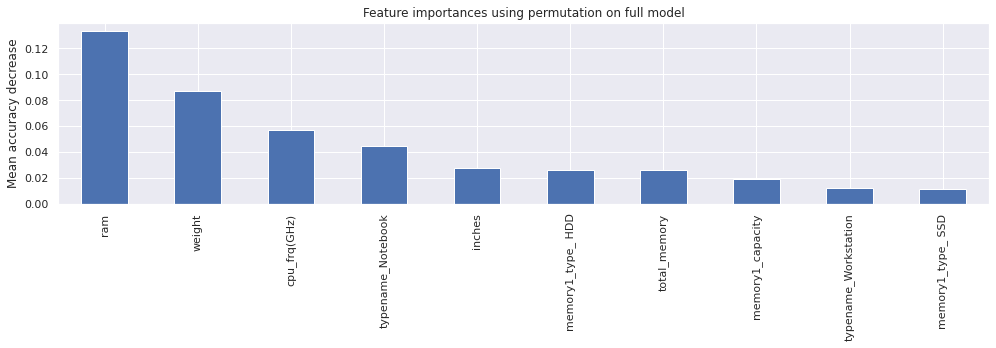

In [ ]:
forest_importances_permutation = pd.Series(result_permutation.importances_mean, index=col_pred)

forest_importances_permutation.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots()
forest_importances_permutation.head(10).plot.bar(ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

* Dari hasil MDI dan MDA, kita mendapatkan fitur terpenting adalah RAM dalam memprediksi model
* RAM, weight, CPU_frq(GHz), dan Jenis Notebook adalah fitur-fitur yang konsisten muncul di 4 fitur teratas hasil MDI dan MDA

# Save Result and Model to Drive

In [ ]:
# from google.colab import drive
# drive.mount('drive')
import pickle

# save the model to disk
pickle.dump(model, open('model_rf_laptop_prediction.pkl', 'wb'))

!cp model_rf_laptop_prediction.pkl "drive/My Drive/Colab Notebooks"

df_out.to_csv('laptop_price_prediction_result.csv', sep=';', encoding='utf-8')

!cp laptop_price_prediction_result.csv "drive/My Drive/Dataset"

# Remarks

Kita berhasil membangun suatu model untuk memprediksi harga laptop dengan metode model selection dan hyperparameter search yang menghasilkan nilai MAE terkecil dengan 180 euro.

# Task

Untuk tugas project silakan kerjakan ulang project ini dengan tambahan:
1. EDA hasil prediksi menggunakan dataframe akhir (df_out)
2. Hitung korelasi menggunakan fungsi corr() dan apakah hasil korelasi tertinggi ditentukan oleh RAM, CPU, weight, dan jenis notebook seperti hasil feature importance?

## **Answer Task:**

## **1. Exploratory Data Analysis Prediction Result**

## **Manufacturing & Type**

In [ ]:
df_out

,inches,ram,weight,cpu_frq(GHz),memory1_capacity,memory2_capacity,total_memory,actual_price_euros,preds_price_euros,company,typename,opsys,cpu,memory1,memory2
0,17.3,4.0,2.36,2.0,1000.0,0.0,1000.0,659.00,583.522773,Dell,Notebook,Windows,Intel Core i3 6006U 2.0GHz,type_ HDD,type_ HDD
1,13.3,8.0,1.23,1.6,256.0,0.0,256.0,1399.00,1747.231680,Dell,Ultrabook,Windows,Intel Core i5 8250U 1.6GHz,type_ SSD,type_ HDD
2,15.6,8.0,1.84,2.7,256.0,0.0,256.0,1304.00,1200.315205,HP,Notebook,Windows,Intel Core i7 7500U 2.7GHz,type_ SSD,type_ HDD
3,15.6,16.0,2.20,2.8,256.0,1000.0,1256.0,2449.00,1706.421410,Asus,Gaming,Windows,Intel Core i7 7700HQ 2.8GHz,type_ SSD,type_ HDD
4,15.6,6.0,2.19,2.5,1000.0,0.0,1000.0,764.00,664.845440,HP,Notebook,Windows,Intel Core i7 6500U 2.5GHz,type_ HDD,type_ HDD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,15.6,8.0,1.98,2.7,256.0,0.0,256.0,895.01,885.699627,Dell,Notebook,Linux,Intel Core i7 7500U 2.7GHz,type_ SSD,type_ HDD
249,15.6,6.0,2.40,2.5,1000.0,0.0,1000.0,564.00,615.856480,Lenovo,Notebook,Windows,Intel Core i5 7200U 2.5GHz,type_ HDD,type_ HDD
250,15.6,8.0,2.20,2.5,256.0,0.0,256.0,997.90,1131.493680,MSI,Gaming,Windows,Intel Core i5 7300HQ 2.5GHz,type_ SSD,type_ HDD
251,17.3,6.0,2.71,2.5,2000.0,0.0,2000.0,655.01,574.449200,HP,Notebook,Windows,AMD A10-Series 9620P 2.5GHz,type_ HDD,type_ HDD


Text(0.5, 1.0, 'Laptop Price by Company')

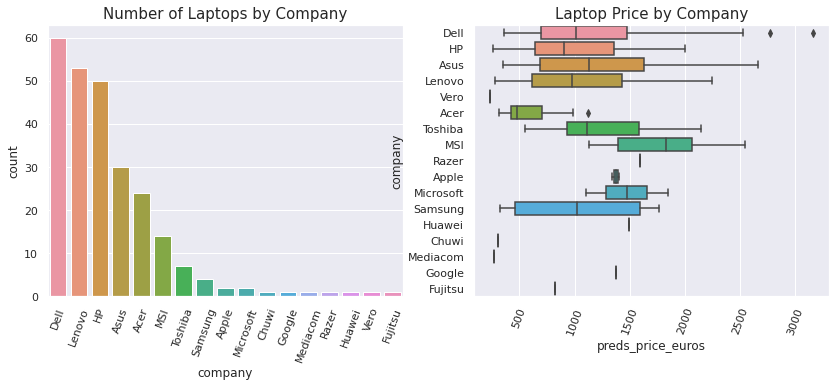

In [ ]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="company",ax=axes[0],data=df_out,order=df_out["company"].value_counts().index)
sns.boxplot(x ='preds_price_euros',y ="company",data = df_out)

axes[0].set_title("Number of Laptops by Company",fontsize=15)
axes[1].set_title("Laptop Price by Company",fontsize=15)

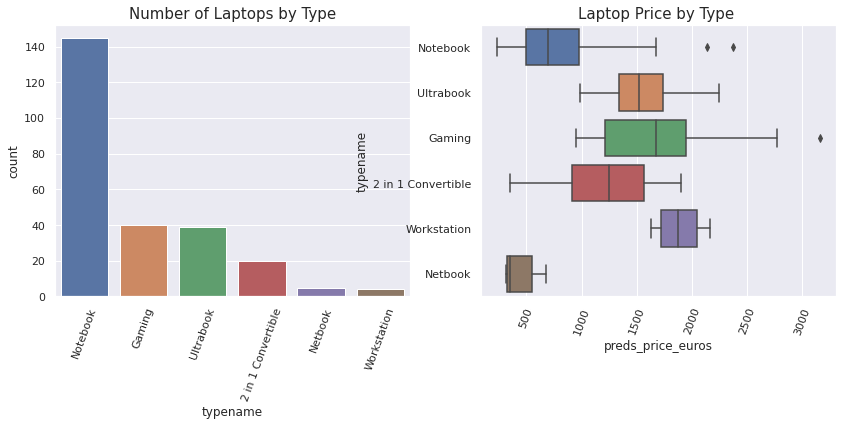

In [ ]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="typename",ax=axes[0],data=df_out,order=df_out["typename"].value_counts().index)
sns.boxplot(x ='preds_price_euros',y ="typename" ,ax=axes[1],data = df_out)

axes[0].set_title("Number of Laptops by Type",fontsize=15)
axes[1].set_title("Laptop Price by Type ",fontsize=15)
plt.show()

- Dell, Lenovo, HP, Asus, Acer adalah brand populer di dataset
- Dari brand yang populer pada dataset, MSI memiliki harga prediksi rata-rata termahal
- Dell, Lenovo, HP, Asus memiliki harga prediksi laptop rata-rata 1000 euro
- Vero paling murah dari semua brand, Acer paling murah dari semua brand yang populer
- Notebook adalah jenis yang paling populer
- Netbook adalah jenis yang paling tidak populer
- Notebooks dan netbooks memiliki harga prediksi rata-rata terendah

##Operating System, Weight, & Screen Size

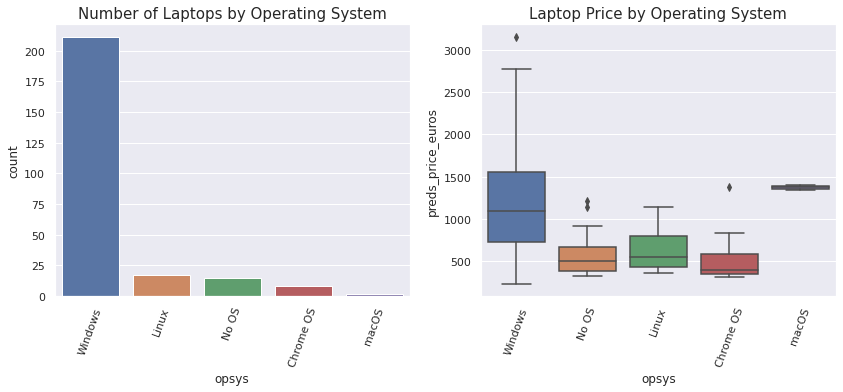

In [ ]:
fig, axes = plt.subplots(1,2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)
sns.countplot(x="opsys",ax=axes[0],data=df_out,order=df_out["opsys"].value_counts().index)
sns.boxplot(x ="opsys",y ='preds_price_euros' ,ax=axes[1],data = df_out)

axes[0].set_title("Number of Laptops by Operating System",fontsize=15)
axes[1].set_title("Laptop Price by Operating System",fontsize=15)
plt.show()

- Kita memiliki 5 sistem operasi Windows, Mac, Chrome, Linux, dan Android. Adapun laptop yang dijual kosongan tanpa sistem operasi (No OS)
- Laptop macOS memiliki harga prediksi rata-rata termahal dan laptop Linux termurah

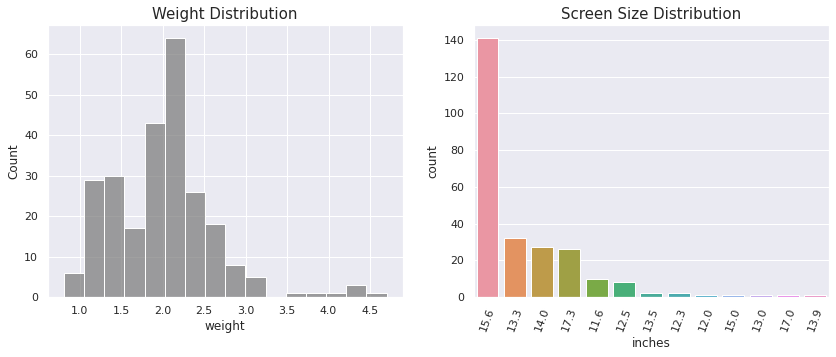

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
sns.histplot(x="weight",ax=axes[0],color="grey",data=df_out)
sns.countplot(x="inches",ax=axes[1],order=df_out["inches"].value_counts().index,data=df_out)
plt.xticks(rotation=70)
axes[0].set_title("Weight Distribution",fontsize=15)
axes[1].set_title("Screen Size Distribution",fontsize=15)

plt.show()

- Lebih dari setengah laptop pada dataset memiliki layar ukuran 15.6 inches.
- [15.6,17.3,14,13.3,12.5,11.6] adalah ukuran layar paling banyak
- [2.20,2.00,2.4,2.5] adalah ukuran berat laptop paling banyak, dan hampir semua laptop memiliki ukuran berat antara 1.3 dan 2.5 .


## RAM and Hard Drive

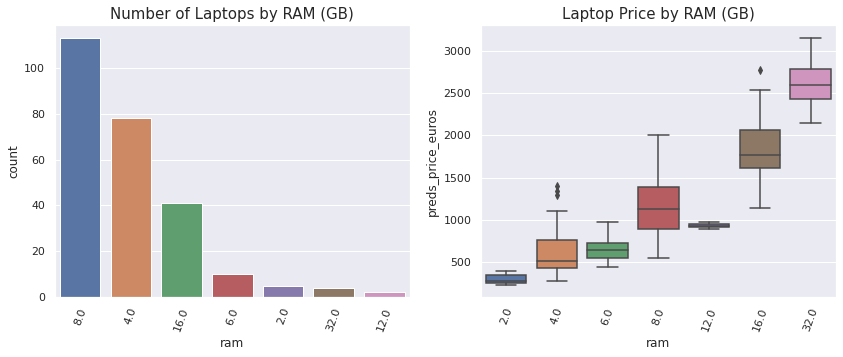

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="ram",ax=axes[0],order=df_out["ram"].value_counts().index,data=df_out)
sns.boxplot(x ="ram",y ="preds_price_euros" ,data = df_out)

axes[0].set_title("Number of Laptops by RAM (GB)",fontsize=15)
axes[1].set_title("Laptop Price by RAM (GB)",fontsize=15)

plt.show()

- Range RAM dari 8 GB hingga 64 GB. RAM paling banyak adalah 8 GB
- Tampak adanya hubungan yang mencolok antara RAM dan harga laptop, semakin besar RAM semakin mahal


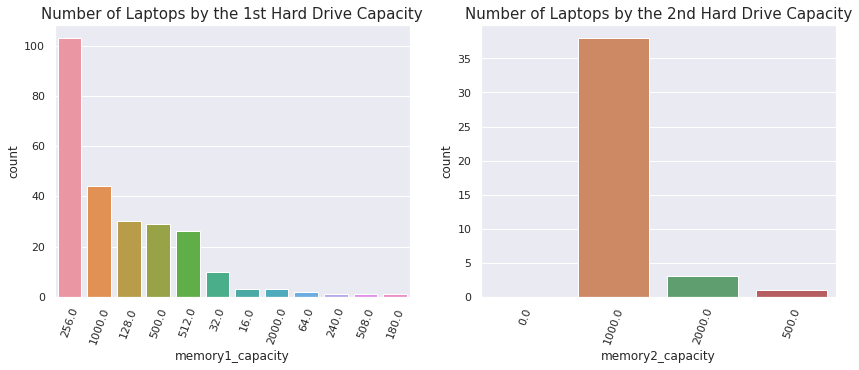

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=70)

sns.countplot(x="memory1_capacity",ax=axes[0],order=df_out["memory1_capacity"].value_counts().index,data=df_out)
sns.countplot(x="memory2_capacity",ax=axes[1],order=df_out["memory2_capacity"].value_counts().index,data=df_out[df_out["memory2_capacity"]!=0])

axes[0].set_title("Number of Laptops by the 1st Hard Drive Capacity",fontsize=15)
axes[1].set_title("Number of Laptops by the 2nd Hard Drive Capacity",fontsize=15)

plt.show()

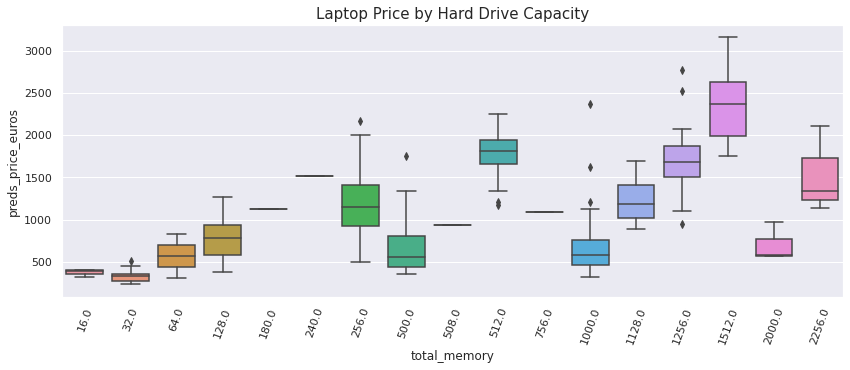

In [ ]:
sns.boxplot(x ="total_memory",y ="preds_price_euros" ,data = df_out)
plt.xticks(rotation=70)
plt.title("Laptop Price by Hard Drive Capacity",fontsize=15)
plt.show()

- Kita memiliki 37 laptop dengan 2 memory.
- Jenis memory 1 paling umum adalah SSD dengan kapasitas 256 GB
- Jenis memory 2 paling umum adalah HDD dengan kapasitas 1000 GB
- Memory 2 memiliki kapasitas lebih besar dari memory 1
- Kapasitas memory memiliki dampak terhadap harga, namun tidak terlalu kuat



In [ ]:
df_out.dtypes

inches                float64
ram                   float64
weight                float64
cpu_frq(GHz)          float64
memory1_capacity      float64
memory2_capacity      float64
total_memory          float64
actual_price_euros    float64
preds_price_euros     float64
company                object
typename               object
opsys                  object
cpu                    object
memory1                object
memory2                object
dtype: object

## Mengubah data categorical menjadi numerical

In [ ]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
def one_hot_encoding(data):
  """
  Let's encode the non_numerical data into a numerical value
  data: your dataset
  """

  data_new_one = data.copy()

  #find non numerical variable/field
  object_data = data_new_one.select_dtypes(include=['object']).columns.to_list()

  #apply one-hot encoder
  one_hot_encoded_data = pd.get_dummies(data_new_one, columns = object_data)

  return one_hot_encoded_data


In [ ]:
df_onehot = df_out

onehot = label_encoding(df_onehot)
onehot

,inches,ram,weight,cpu_frq(GHz),memory1_capacity,memory2_capacity,total_memory,actual_price_euros,preds_price_euros,company,typename,opsys,cpu,memory1,memory2
0,17.3,4.0,2.36,2.0,1000.0,0.0,1000.0,659.00,583.522773,4,3,3,20,1,0
1,13.3,8.0,1.23,1.6,256.0,0.0,256.0,1399.00,1747.231680,4,4,3,35,3,0
2,15.6,8.0,1.84,2.7,256.0,0.0,256.0,1304.00,1200.315205,7,3,3,40,3,0
3,15.6,16.0,2.20,2.8,256.0,1000.0,1256.0,2449.00,1706.421410,2,1,3,44,4,0
4,15.6,6.0,2.19,2.5,1000.0,0.0,1000.0,764.00,664.845440,7,3,3,36,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,15.6,8.0,1.98,2.7,256.0,0.0,256.0,895.01,885.699627,4,3,1,40,3,0
249,15.6,6.0,2.40,2.5,1000.0,0.0,1000.0,564.00,615.856480,9,3,3,30,1,0
250,15.6,8.0,2.20,2.5,256.0,0.0,256.0,997.90,1131.493680,10,1,3,31,3,0
251,17.3,6.0,2.71,2.5,2000.0,0.0,2000.0,655.01,574.449200,7,3,3,0,1,0


## 2. Fungsi Korelasi 

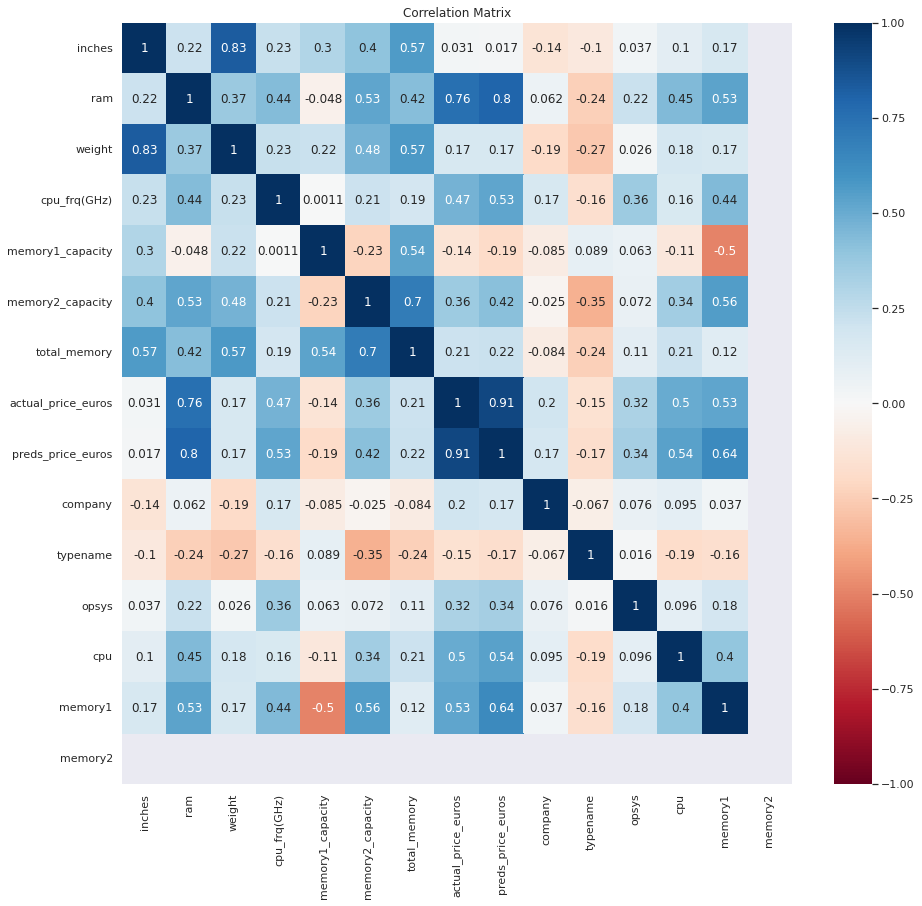

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,14))
sns.heatmap(labelfix.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Insights dari correlation matrix:

RAM memiliki korelasi positif yang tinggi dengan harga prediksi (+0,8): laptop yang miliki RAM lebih tinggi cenderung memiliki harga prediksi yang lebih tinggi
Frekuensi CPU memiliki korelasi positif yang cukup moderat dengan harga prediksi (+0,53)
Ukuran layar dan Berat memiliki korelasi positif yang tinggi (+0,83) karena laptop dengan layar lebih besar cenderung lebih berat.

